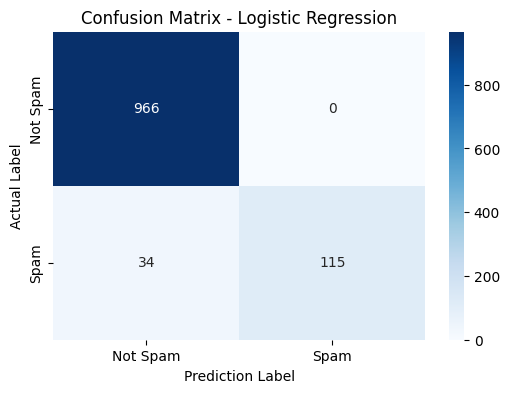


Logistic Regression Model:
Accuracy: 0.9695067264573991
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



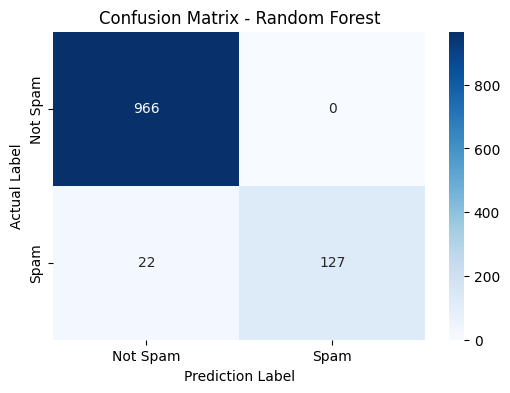


Random Forest Model:
Accuracy: 0.9802690582959641
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



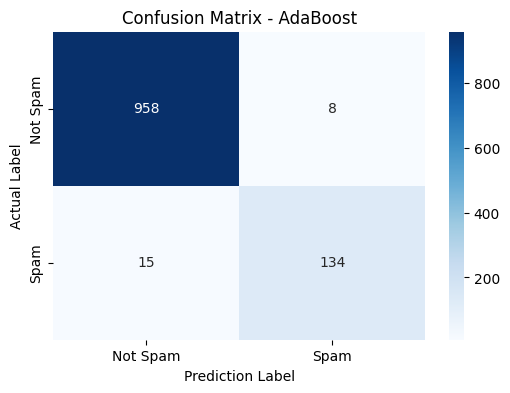


AdaBoost Model:
Accuracy: 0.979372197309417
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       966
        spam       0.94      0.90      0.92       149

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



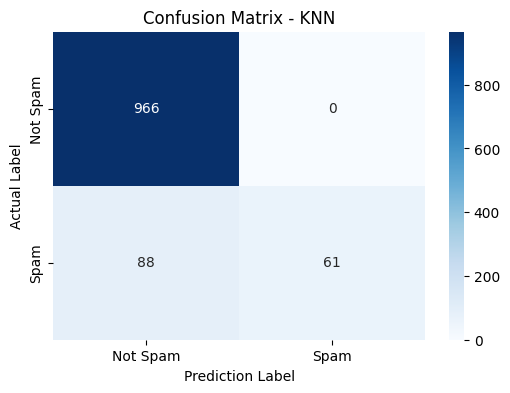


KNN Model:
Accuracy: 0.9210762331838565
Classification Report:
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       966
        spam       1.00      0.41      0.58       149

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.77      1115
weighted avg       0.93      0.92      0.91      1115


Logistic Regression Model Prediction for the User's Message:
Spam

Random Forest Model Prediction for the User's Message:
Spam

AdaBoost Model Prediction for the User's Message:
Spam

KNN Model Prediction for the User's Message:
Spam


In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

df = pd.read_csv('spam.csv')

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x=tfidf_vectorizer.fit_transform(df['Message'])
y=df['Category']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

models={
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'KNN':KNeighborsClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    report=classification_report(y_test,y_pred)

    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True, fmt="d",cmap="Blues",xticklabels=['Not Spam','Spam'],yticklabels=['Not Spam','Spam'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Prediction Label")
    plt.ylabel("Actual Label")
    plt.show()

    print(f"\n{name} Model:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")

# Assuming models, tfidf_vectorizer, and other necessary imports are already defined

# Ask the user to input a message
user_message = input("Enter the message to check for spam: ")

# Transform the user's message using the trained TfidfVectorizer
user_message_transformed = tfidf_vectorizer.transform([user_message])

# Use each model to make predictions
for name, model in models.items():
    prediction = model.predict(user_message_transformed)
    
    print(f"\n{name} Model Prediction for the User's Message:")
    print("Ham" if prediction == 1 else "Spam")
